# Eighth Practice ML

In this practice, we will learn **Unsupervised Learning** like **KMeans** and **Hierarchical Clustering**.   
We will also learn **Feature Compression** with **PCA**.  
We will use **NBC (Naive Bayes)** and **LDA (Linear Discriminant Analysis)** as models.  
We will also learn how to use **D-Tale** to show data reports and work with tabular data frames.  

## D-Tale  
![image](https://user-images.githubusercontent.com/41818563/103220485-09b0ca80-4929-11eb-81ee-1cd14634f0c7.png)


[D-Tale](https://www.man.com/d-tale) is a lightweight tool that allows users to view all aspects of their data while maintaining the ability to perform simple operations such as sorting, filtering, and formatting.  

D-Tale was born out of a pre-existing internal solution for viewing SAS datasets but meant for users of Python Pandas data structures, e.g. Series and DataFrames.  

This tool is strongly geared towards anyone who used Pandas data structures (Series, DataFrame, etc.) in their day-to-day operations and needs an easier way of visualizing data without writing cumbersome Python in an editor (which is still the way to go if you need full control).  

## Downloads, Imports, and Definitions

We update packages that their Colab version is too old.  

In [1]:
# upgrade plotly and install dtale
!pip install --upgrade plotly
!pip install dtale

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


We import our regular packages.

In [2]:
# import numpy, matplotlib, etc.
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go

# sklearn imports
from sklearn import metrics
from sklearn import pipeline
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import neural_network
from sklearn import model_selection
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

## Data Exploration

We use the updated [Pokemon](https://www.kaggle.com/takamasakato/pokemon-all-status-data) dataset.  
![image](https://user-images.githubusercontent.com/41818563/103220792-cd319e80-4929-11eb-8848-2620a575145c.png)  

### Overview
This dataset includes 1052 Pokemon (from 1st to 8th generation).  
Each sample (Pokemon) has 32 features.  

### Description  

1. **NUMBER**  
Each Pokemon has several Pokedex numbers. It's listed in this column.  
Some Pokemon have multiple appearances, status, evolution, or generation. In these cases, it is listed with the same numbers.   
2. **CODE**  
Some Pokemon have multiple appearances, status, evolution, or generation.  
If the Pokemon has multiple appearances, status, or other, the code is distinguished between each Pokemon.  
3. **SERIAL**  
The number to distinguish between each Pokemon, appearance, status, or other factors.  
The number is equal to `10*NUMBER + CODE`.  
4. **NAME**  
Name for each Pokemon.   
5. **TYPE1**  
Each Pokemon has a type. The type is listed in this column.  
6. **TYPE2**  
Some Pokemon have two types (dual type). If the Pokemon is dual type, the second type is listed in this column.  
7. **COLOR**  
Each Pokemon has a color. It's listed in this column.  
8. **ABILITY1**  
Each Pokemon has an ability. The ability is listed in this column.  
9. **ABILITY2**  
Some Pokemon has an alternative ability. If the Pokemon has an alternative ability, it is listed in this column.  
10. **HIDDEN ABILITY**  
Some Pokemon has a special ability. it is listed in this column.  
11. **GENERATION**  
The number of generations for each Pokemon.  
Mega evolved Pokemon's generation number is equivalent to origin (before evolution) Pokemon.    
12. **LEGENDARY**  
The Pokemon that are part of a group of incredibly rare Pokemons and often has a very powerful status, called legendary Pokemon.   
If the Pokemon is a legendary Pokemon (includes mythical Pokemons), then filled 1, else filled 0.  
13. **MEGA_EVOLUTION**  
Some Pokemon can Mega Evolve.  
If the Pokemon is Mega Evolved Pokemon, then filled 1, else filled 0.  
14. **HEIGHT**  
Height for each Pokemon.  
15. **WEIGHT**  
Weight for each Pokemon.  
16. **HP (Hit Point)**  
One of Pokemon's base stats. It determines how much damage a Pokemon can receive before fainting.   
17. **ATK (Physical Attack)**  
One of Pokemon's base stats. It determines how much damage the Pokemon deals when using a Physical Move.  
18. **DEF (Physical Defense)**  
One of Pokemon's base stats. It determines how much damage the Pokemon receives when it's hit with a Physical Move.  
19. **SP_ATK (Special Attack)**  
One of Pokemon's base stats. It determines how much damage the Pokemon deals when using a Special Move.  
20. **SP_DEF (Special Defense)**  
One of Pokemon's base stats. It determines how much damage the Pokemon receives when it's hit with a Special Move.  
21. **SPD (Speed)**  
One of Pokemon's base stats. It determines the order of Pokemon that can act in battle.  
22. **TOTAL**  
Summed up each base stats.  
23. **CAPTURE_RATE**  
It is that indicates the ease of catching. The higher the value, the easier it is to catch.  
24. **BASEEGGCYCLE**  
It is that represents the number of steps required for a Pokemon egg to hatch.  
25. **BASE_EXP**  
When the Pokémon is defeated in battle, it will give EXP values to the Pokémon that participated in the battle against it.  
26. **EFFORT_HP**  
When the Pokémon is defeated in battle, it will give effort HP values to the Pokémon that participated in the battle against it.  
27. **EFFORT_ATK**  
When the Pokémon is defeated in battle, it will give effort attack values to the Pokémon that participated in the battle against it.  
28. **EFFORT_DEF**    
When the Pokémon is defeated in battle, it will give effort defense values to the Pokémon that participated in the battle against it.    
29. **EFFORTSPATK**  
When the Pokémon is defeated in battle, it will give effort special attack values to the Pokémon that participated in the battle against it.  
30. **EFFORTSPDEF**  
When the Pokémon is defeated in battle, it will give effort special defense values to the Pokémon that participated in the battle against it.  
31. **EFFORT_SPD**   
When the Pokémon is defeated in battle, it will give effort speed values to the Pokémon that participated in the battle against it.  
32. **EFFORT_TOTAL**  
・Summed up each effort values.  


### Quote  
[bulbapedia](https://bulbapedia.bulbagarden.net/wiki/Main_Page)  
[pokemon database](https://pokemondb.net/)  

![image](https://user-images.githubusercontent.com/41818563/103223361-bb062f00-492e-11eb-822f-9cde23fa8bb7.png)  

Let's download the dataset from Github and explore it with Pandas tools.

In [3]:
# download pokemon.csv file from Github 
!wget https://gist.githubusercontent.com/aviasd/070b68d1068e92f059e143a1f4655e77/raw/2707de87c3f6ddc29246658bda5b1afc1058a4f7/Pokedex_Ver7.csv

--2021-01-01 00:00:12--  https://gist.githubusercontent.com/aviasd/070b68d1068e92f059e143a1f4655e77/raw/2707de87c3f6ddc29246658bda5b1afc1058a4f7/Pokedex_Ver7.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128917 (126K) [text/plain]
Saving to: ‘Pokedex_Ver7.csv.3’

Pokedex_Ver7.csv.3  100%[===================>] 125.90K  --.-KB/s    in 0.02s   

2021-01-01 00:00:12 (7.30 MB/s) - ‘Pokedex_Ver7.csv.3’ saved [128917/128917]



In [4]:
# load the Pokedex_Ver7.csv file
pokemon_df = pd.read_csv('Pokedex_Ver7.csv')
pokemon_df

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,GENERATION,LEGENDARY,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE,BASE_EGG_CYCLES,BASE_EXP,EFFORT_HP,EFFORT_ATK,EFFORT_DEF,EFFORT_SP_ATK,EFFORT_SP_DEF,EFFORT_SPD,EFFORT_TOTAL
0,1,1,11,Bulbasaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,1,0,0,0.7,6.9,45,49,49,65,65,45,318,45,5120,64,0,0,0,1,0,0,1
1,2,1,21,Ivysaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,1,0,0,1.0,13.0,60,62,63,80,80,60,405,45,5120,142,0,0,0,1,1,0,2
2,3,1,31,Venusaur,Grass,Poison,Green,Overgrow,NaN,Chrolophyll,1,0,0,2.0,100.0,80,82,83,100,100,80,525,45,5120,263,0,0,0,2,1,0,3
3,3,2,32,Mega Venusaur,Grass,Poison,Green,Thick Fat,NaN,NaN,1,0,1,2.4,155.5,80,100,123,122,120,80,625,45,5120,313,0,0,0,2,1,0,3
4,4,1,41,Charmander,Fire,NaN,Red,Blaze,NaN,Solar Power,1,0,0,0.6,8.5,39,52,43,60,50,65,309,45,5120,62,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,896,1,8961,Glastrier,Ice,NaN,White,Chilling Neigh,NaN,NaN,8,1,0,2.2,800.0,100,145,130,65,110,30,580,3,30720,290,0,3,0,0,0,0,3
1048,897,1,8971,Spectrier,Ghost,NaN,Black,Grim Neigh,NaN,NaN,8,1,0,2.0,44.5,100,65,60,145,80,130,580,3,30720,290,0,0,0,3,0,0,3
1049,898,1,8981,Calyrex,Psychic,Grass,Green,Unnerve,NaN,NaN,8,1,0,1.1,7.7,100,80,80,80,80,80,500,3,30720,250,3,0,0,0,0,0,3
1050,898,2,8982,Calyrex,Psychic,Ice,White,As One,NaN,NaN,8,1,0,2.4,809.1,100,165,150,85,130,50,680,3,30720,340,0,3,0,0,0,0,3


In [5]:
# show pokemon_df info
pokemon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1052 entries, 0 to 1051
Data columns (total 32 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NUMBER           1052 non-null   int64  
 1   CODE             1052 non-null   int64  
 2   SERIAL           1052 non-null   int64  
 3   NAME             1052 non-null   object 
 4   TYPE1            1052 non-null   object 
 5   TYPE2            558 non-null    object 
 6   COLOR            1052 non-null   object 
 7   ABILITY1         1052 non-null   object 
 8   ABILITY2         523 non-null    object 
 9   ABILITY HIDDEN   819 non-null    object 
 10  GENERATION       1052 non-null   int64  
 11  LEGENDARY        1052 non-null   int64  
 12  MEGA_EVOLUTION   1052 non-null   int64  
 13  HEIGHT           1052 non-null   float64
 14  WEIGHT           1052 non-null   float64
 15  HP               1052 non-null   int64  
 16  ATK              1052 non-null   int64  
 17  DEF           

In [6]:
# show pokemon_df description
pokemon_df.describe()

,NUMBER,CODE,SERIAL,GENERATION,LEGENDARY,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE,BASE_EGG_CYCLES,BASE_EXP,EFFORT_HP,EFFORT_ATK,EFFORT_DEF,EFFORT_SP_ATK,EFFORT_SP_DEF,EFFORT_SPD,EFFORT_TOTAL
count,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.00000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000,1052.000000
mean,441.332700,1.191065,4414.518061,4.274715,0.120722,0.047529,1.259221,71.029468,69.923954,80.287072,74.385932,72.791825,72.016160,68.652091,438.057034,93.880228,7984.18251,161.090304,0.225285,0.509506,0.269011,0.373574,0.211027,0.323194,1.911597
std,260.673105,0.529434,2606.720549,2.275842,0.325959,0.212868,1.254768,131.805231,26.022129,32.437825,30.690272,32.718640,27.499481,30.100856,120.173117,76.065416,7686.55242,88.729495,0.654057,0.898728,0.652062,0.836936,0.611616,0.715543,0.751009
min,1.000000,1.000000,11.000000,1.000000,0.000000,0.000000,0.100000,0.100000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,175.000000,3.000000,1280.00000,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,214.750000,1.000000,2148.750000,2.000000,0.000000,0.000000,0.600000,9.000000,50.000000,55.000000,50.000000,50.000000,50.000000,45.000000,330.000000,45.000000,5120.00000,67.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,436.500000,1.000000,4366.000000,4.000000,0.000000,0.000000,1.000000,29.500000,68.000000,77.000000,70.000000,65.000000,70.000000,65.000000,457.000000,60.000000,5120.00000,161.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,666.250000,1.000000,6663.500000,6.000000,0.000000,0.000000,1.600000,70.625000,81.250000,100.000000,90.000000,95.000000,90.000000,90.000000,515.000000,127.000000,6400.00000,203.750000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,898.000000,6.000000,8983.000000,8.000000,1.000000,1.000000,14.500000,999.900000,255.000000,190.000000,230.000000,194.000000,230.000000,200.000000,780.000000,255.000000,30720.00000,635.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


We will use [D-Tale](https://github.com/man-group/dtale) EDA (Exploratory Data Analysis) tool.

In [7]:
import dtale
import dtale.app as dtale_app

dtale_app.USE_NGROK = True
dtale.show(pokemon_df, ignore_duplicate=True)

2021-01-01 00:00:14,289 - INFO     - NumExpr defaulting to 2 threads.


http://bec52c30e420.ngrok.io/dtale/main/1

We can click on the link and go to the D-Tale client.  
This client is running on a server on our machine.  
We can show statistics and manipulate the dataset.  
We can also generate code or export it as a CSV file.  

Let's prepare our dataset (encoding and filling empty values).  

In [8]:
# encdoe and fill empty values
categorical_cols = pokemon_df.select_dtypes(include=['object', 'bool']).columns
numerical_cols = pokemon_df.select_dtypes(include=['int64', 'float64']).columns
ordinal_cols = pokemon_df.select_dtypes(include=['int64']).columns
all_cols = categorical_cols.tolist() + numerical_cols.tolist()

pokemon_df_cp = pokemon_df.copy()
pokemon_df_cp.fillna('empty', inplace=True)

oe = OrdinalEncoder().fit(pokemon_df_cp[categorical_cols])

pokemon_df_cp[categorical_cols] = oe.transform(pokemon_df_cp[categorical_cols])
pokemon_df_cp

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,GENERATION,LEGENDARY,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE,BASE_EGG_CYCLES,BASE_EXP,EFFORT_HP,EFFORT_ATK,EFFORT_DEF,EFFORT_SP_ATK,EFFORT_SP_DEF,EFFORT_SPD,EFFORT_TOTAL
0,1,1,11,82.0,9.0,13.0,3.0,117.0,126.0,11.0,1,0,0,0.7,6.9,45,49,49,65,65,45,318,45,5120,64,0,0,0,1,0,0,1
1,2,1,21,372.0,9.0,13.0,3.0,117.0,126.0,11.0,1,0,0,1.0,13.0,60,62,63,80,80,60,405,45,5120,142,0,0,0,1,1,0,2
2,3,1,31,887.0,9.0,13.0,3.0,117.0,126.0,11.0,1,0,0,2.0,100.0,80,82,83,100,100,80,525,45,5120,263,0,0,0,2,1,0,3
3,3,2,32,525.0,9.0,13.0,3.0,193.0,126.0,157.0,1,0,1,2.4,155.5,80,100,123,122,120,80,625,45,5120,313,0,0,0,2,1,0,3
4,4,1,41,107.0,6.0,18.0,7.0,15.0,126.0,122.0,1,0,0,0.6,8.5,39,52,43,60,50,65,309,45,5120,62,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,896,1,8961,292.0,11.0,18.0,8.0,18.0,126.0,157.0,8,1,0,2.2,800.0,100,145,130,65,110,30,580,3,30720,290,0,3,0,0,0,0,3
1048,897,1,8971,783.0,8.0,18.0,0.0,65.0,126.0,157.0,8,1,0,2.0,44.5,100,65,60,145,80,130,580,3,30720,290,0,0,0,3,0,0,3
1049,898,1,8981,90.0,14.0,9.0,3.0,201.0,126.0,157.0,8,1,0,1.1,7.7,100,80,80,80,80,80,500,3,30720,250,3,0,0,0,0,0,3
1050,898,2,8982,90.0,14.0,11.0,8.0,5.0,126.0,157.0,8,1,0,2.4,809.1,100,165,150,85,130,50,680,3,30720,340,0,3,0,0,0,0,3


We can reconstruct the original df with the categories from the encoder.  

In [9]:
# show categories of encoder
oe.categories_

[array(['Abomasnow', 'Abra', 'Absol', 'Accelgor', 'Aegislash',
        'Aerodactyl', 'Aggron', 'Aipom', 'Alakazam', 'Alcremie',
        'Alomomola', 'Altaria', 'Amaura', 'Ambipom', 'Amoonguss',
        'Ampharos', 'Anorith', 'Appletun', 'Applin', 'Araquanid', 'Arbok',
        'Arcanine', 'Arceus', 'Archen', 'Archeops', 'Arctovish',
        'Arctozolt', 'Ariados', 'Armaldo', 'Aromatisse', 'Aron',
        'Arrokuda', 'Articuno', 'Audino', 'Aurorus', 'Avalugg', 'Axew',
        'Azelf', 'Azumarill', 'Azurill', 'Bagon', 'Baltoy', 'Banette',
        'Barbaracle', 'Barboach', 'Barraskewda', 'Basculin', 'Bastiodon',
        'Bayleef', 'Beartic', 'Beautifly', 'Beedrill', 'Beheeyem',
        'Beldum', 'Bellossom', 'Bellsprout', 'Bergmite', 'Bewear',
        'Bibarel', 'Bidoof', 'Binacle', 'Bisharp', 'Blacephalon',
        'Blastoise', 'Blaziken', 'Blipbug', 'Blissey', 'Blitzle',
        'Boldore', 'Boltund', 'Bonsly', 'Bouffalant', 'Bounsweet',
        'Braixen', 'Braviary', 'Breloom', 'Brionne'

## PCA  
[PCA](https://scikit-learn.org/stable/modules/decomposition.html#principal-component-analysis-pca) is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance.  
In Scikit-learn, PCA is implemented as a transformer object that learns components in its fit method and can be used on new data to project it on these components.  

Let's use Scikit-learn [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to reduce the number of features in our dataset.  
We will reduce to two features and show the samples on a graph.  

In [10]:
# convert data points to 2dim with pca
from sklearn.decomposition import PCA

pca = PCA(n_components=2).fit(pokemon_df_cp)
pca_pokemon_df = pd.DataFrame(pca.transform(pokemon_df_cp), columns=['pc1', 'pc2'])
pca_pokemon_df

,pc1,pc2
0,-3252.467281,4147.886777
1,-3249.660580,4139.822527
2,-3245.247029,4133.207242
3,-3243.763135,4130.256263
4,-3249.501490,4117.844871
...,...,...
1047,23059.801772,-2511.606461
1048,23055.800987,-2518.285650
1049,23054.093658,-2532.469744
1050,23062.732488,-2533.739066


Let's see the samples on a graph.  

In [11]:
# show data points on a graph
fig = px.scatter(pca_pokemon_df, x='pc1', y='pc2')
fig.show()

## Unsupervised Learning

We can use Unsupervised learning to research our dataset further.  
We can use two algorithms that will help us cluster our dataset samples:
1. KMeans
2. Hierarchical Clustering

### KMeans  
The [KMeans](https://scikit-learn.org/stable/modules/clustering.html#k-means) algorithm clusters data by trying to separate samples in `K` groups of equal variance, minimizing a criterion known as the inertia or within-cluster sum-of-squares.  
This algorithm requires the number of clusters to be specified.  
It scales well to a large number of samples and has been used across a large range of application areas in many different fields.  

The KMeans algorithm divides a set of `N` samples `X` into `K` disjoint clusters `C`, each described by the mean `Uc` of the samples in the cluster.  
The means are commonly called the cluster "centroids"; note that they are not, in general, points from `X`, although they live in the same space.  

The K-means algorithm aims to choose centroids that minimize the inertia, or within-cluster sum-of-squares criterion:  
![image](https://user-images.githubusercontent.com/41818563/103242828-54016e00-4960-11eb-838e-bc0bd352a980.png)

### Hierarchical Clustering
[Hierarchical Clustering](https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering) is a general family of clustering algorithms that build nested clusters by merging or splitting them successively.  
This hierarchy of clusters is represented as a tree (or dendrogram).  
The root of the tree is the unique cluster that gathers all the samples, the leaves being the clusters with only one sample.  
See the [Wikipedia page](https://en.wikipedia.org/wiki/Hierarchical_clustering) for more details.  

The [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) object performs a hierarchical clustering using a bottom-up approach: each observation starts in its cluster, and clusters are successively merged.  
The linkage criteria determine the metric used for the merge strategy:
* **Ward** minimizes the sum of squared differences within all clusters.  
It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.  
* **Maximum** or **Complete Linkage** minimizes the maximum distance between observations of pairs of clusters.  
* **Average Linkage** minimizes the average of the distances between all observations of pairs of clusters.  
* **Single Linkage** minimizes the distance between the closest observations of pairs of clusters.  

Let's use Scikit-learn [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans) on our Pokemon dataset.  

In [12]:
# cluster with KMeans and show cluster centers
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=1).fit(pokemon_df_cp)
kmeans.cluster_centers_

array([[ 2.06313278e+02,  1.17634855e+00,  2.06430913e+03,
         4.86526971e+02,  9.83402490e+00,  1.35892116e+01,
         4.05601660e+00,  1.19929461e+02,  8.99813278e+01,
         9.37116183e+01,  2.50622407e+00,  7.21644966e-16,
         7.67634855e-02,  1.17572614e+00,  5.40375519e+01,
         6.55082988e+01,  7.44564315e+01,  7.01431535e+01,
         6.68443983e+01,  6.77074689e+01,  6.47842324e+01,
         4.09443983e+02,  1.05715768e+02,  5.29792531e+03,
         1.40844398e+02,  2.38589212e-01,  4.29460581e-01,
         2.61410788e-01,  2.94605809e-01,  2.05394191e-01,
         3.31950207e-01,  1.76141079e+00],
       [ 6.41886598e+02,  1.40206186e+00,  6.42026804e+03,
         5.32917526e+02,  8.89690722e+00,  1.19793814e+01,
         4.60824742e+00,  1.01876289e+02,  1.24742268e+02,
         1.51721649e+02,  5.44329897e+00,  1.00000000e+00,
         7.21649485e-02,  2.72577320e+00,  2.46844330e+02,
         9.70412371e+01,  1.16309278e+02,  9.57216495e+01,
         1.13

Let's show all points and cluster centers on a graph with different colors for different clusters.  
We need to round the centroids' (cluster centers) values to make them look like real data points (real Pokemons).  

In [13]:
# roud a number to the closest integer (or min/max if it is not in range)
def round_number_to_closest_int(number, min, max):
    if number < min:
        return min
    elif number > max:
        return max
    else:
        return round(number)

In [14]:
# round number in columns to closest integers
def round_columns_to_closest_int(df, origin_df, columns):
    for col in columns:
        min_in_col = origin_df[col].min()
        max_in_col = origin_df[col].max()
        df[col] = df[col].apply(lambda s: round_number_to_closest_int(s, min_in_col, max_in_col))
    return df

In [15]:
# show the means of the clusters as if they were real data points
mean_clusters = pd.DataFrame(kmeans.cluster_centers_, columns=pokemon_df_cp.columns)
mean_clusters = round_columns_to_closest_int(mean_clusters, pokemon_df_cp, ordinal_cols)
mean_clusters = round_columns_to_closest_int(mean_clusters, pokemon_df_cp, categorical_cols)

mean_clusters_cp = mean_clusters.copy()
mean_clusters_cp[categorical_cols] = oe.inverse_transform(mean_clusters_cp[categorical_cols])
mean_clusters_cp.replace('empty', np.NaN, inplace=True)
mean_clusters_cp

,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,GENERATION,LEGENDARY,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE,BASE_EGG_CYCLES,BASE_EXP,EFFORT_HP,EFFORT_ATK,EFFORT_DEF,EFFORT_SP_ATK,EFFORT_SP_DEF,EFFORT_SPD,EFFORT_TOTAL
0,206,1,2064,Mega Beedrill,Ground,Psychic,Grey,Pickup,Sniper,Propeller Tail,3,0,0,1.175726,54.037552,66,74,70,67,68,65,409,106,5298,141,0,0,0,0,0,0,2
1,642,1,6420,Mesprit,Grass,Normal,Pink,Mega Launcher,White Smoke,Water Veil,5,1,0,2.725773,246.844330,97,116,96,114,96,99,618,26,30720,305,1,1,0,1,0,0,3
2,652,1,6517,Magikarp,Grass,Poison,Grey,Misty Surge,Sniper,Prankster,6,0,0,1.019647,49.467991,68,78,73,69,70,65,424,100,5422,146,0,1,0,0,0,0,2
3,369,1,3696,Milotic,Ice,Ice,Pink,Innards Out,NaN,Snow Cloak,4,1,0,1.585000,116.200000,88,91,102,100,107,92,580,3,20480,290,0,1,1,1,1,0,3


We can also show the clusters centers on a graph of two dimensions with the help of PCA for dimensionality reduction.

In [16]:
# convert cluster centers to 2dim with pca
pca_mean_clusters = pd.DataFrame(pca.transform(mean_clusters), columns=['pc1', 'pc2'])
pca_mean_clusters

,pc1,pc2
0,-2887.673190,2111.671278
1,22827.156654,33.520135
2,-2362.415398,-2334.551516
3,12382.402367,1841.165139


In [17]:
# show cluster centers on a graph
fig = px.scatter(pca_mean_clusters, x='pc1', y='pc2', color=pca_mean_clusters.index)
fig.show()

We can connect the two graphs and show a graph with the cluster centers and the data points together.  

In [18]:
# add cluster column for each df
pca_mean_clusters_cp = pca_mean_clusters.copy()
pca_mean_clusters_cp['cluster'] = kmeans.predict(mean_clusters)
display(pca_mean_clusters_cp)

pca_pokemon_df_cp = pca_pokemon_df.copy()
pca_pokemon_df_cp['cluster'] = kmeans.predict(pokemon_df_cp)
display(pca_pokemon_df_cp)

,pc1,pc2,cluster
0,-2887.673190,2111.671278,0
1,22827.156654,33.520135,1
2,-2362.415398,-2334.551516,2
3,12382.402367,1841.165139,3


,pc1,pc2,cluster
0,-3252.467281,4147.886777,0
1,-3249.660580,4139.822527,0
2,-3245.247029,4133.207242,0
3,-3243.763135,4130.256263,0
4,-3249.501490,4117.844871,0
...,...,...,...
1047,23059.801772,-2511.606461,1
1048,23055.800987,-2518.285650,1
1049,23054.093658,-2532.469744,1
1050,23062.732488,-2533.739066,1


In [19]:
# show data points and cluster centers together (each color means a cluster)
fig = go.Figure()
fig.add_trace(go.Scatter(x=pca_mean_clusters_cp.pc1, y=pca_mean_clusters_cp.pc2, mode='markers', marker=dict(size=20, symbol='cross', color=pca_mean_clusters_cp.cluster)))
fig.add_trace(go.Scatter(x=pca_pokemon_df_cp.pc1, y=pca_pokemon_df_cp.pc2, mode='markers' ,marker=dict(color=pca_pokemon_df_cp.cluster)))
fig.show()

We can use Scikit-learn [AgglomerativeClustering](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html#sklearn.cluster.AgglomerativeClustering) as a Hierarchical Clustering.  
We can plot the dendrogram with Scipy [dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html).  

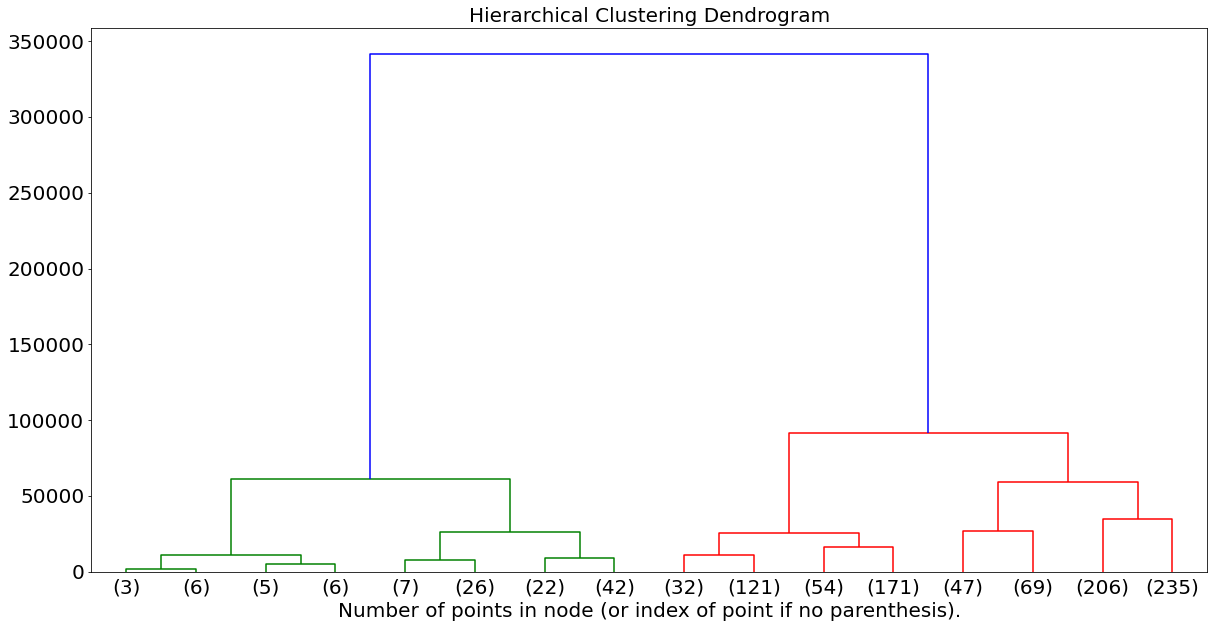

In [20]:
# calculate Hierarchical Clustering and plot dendogram
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    dendrogram(linkage_matrix, **kwargs)

agg = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
agg = agg.fit(pokemon_df_cp)

plt.figure(figsize=(20, 10))
plot_dendrogram(agg, truncate_mode='level', p=3)

plt.title('Hierarchical Clustering Dendrogram', fontsize=20)
plt.xlabel("Number of points in node (or index of point if no parenthesis).", fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## NBC (Naive Bayes)  

[Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#naive-bayes) methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the "naive" assumption of conditional independence between every pair of features given the value of the class variable.  
Bayes’ theorem states the following relationship, given class variable `y` and dependent feature vector `x1` through `xn`:  
![image](https://user-images.githubusercontent.com/41818563/103249746-58865080-4979-11eb-8c32-c8d46ff410ab.png)

Using the naive conditional independence assumption that:  
![image](https://user-images.githubusercontent.com/41818563/103249775-7b186980-4979-11eb-9842-2ebbc3225934.png)

for all `i`, this relationship is simplified to:  
![image](https://user-images.githubusercontent.com/41818563/103249811-aac77180-4979-11eb-95b0-6566ad2999c2.png)  

Since `P(x1,...,xn)` is constant given the input, we can use the following classification rule:  
![image](https://user-images.githubusercontent.com/41818563/103249919-245f5f80-497a-11eb-8999-b32e107989f3.png)  

We can use [Maximum A Posteriori (MAP) estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) to estimate `P(y)` and `P(xi|y)`
; the former is then the relative frequency of class in the training set.

The different naive Bayes classifiers differ mainly by the assumptions they make regarding the distribution of `P(xi|y)`.  

In spite of their apparently over-simplified assumptions, naive Bayes classifiers have worked quite well in many real-world situations, famously document classification and spam filtering.  
They require a small amount of training data to estimate the necessary parameters (for theoretical reasons why naive Bayes works well, and on which types of data it does, see [The Optimality of Naive Bayes](https://www.cs.unb.ca/~hzhang/publications/FLAIRS04ZhangH.pdf)).  

Naive Bayes learners and classifiers can be extremely fast compared to more sophisticated methods.  
The decoupling of the class conditional feature distributions means that each distribution can be independently estimated as a one-dimensional distribution.  
This in turn helps to alleviate problems stemming from the curse of dimensionality.  

On the flip side, although naive Bayes is known as a decent classifier, it is known to be a bad estimator, so the probability outputs from `predict_proba` are not to be taken too seriously.  

Let's use Scikit-learn [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn-naive-bayes-gaussiannb) to classify the Pokemons into types.  
We will use **LEGENDARY** as a label.  

In [21]:
# divide the data to features and target
target_column = 'LEGENDARY'
t = pokemon_df_cp[target_column].copy()
X = pokemon_df_cp.drop([target_column], axis=1)
print('t')
display(t)
print()
print('X')
display(X)

t


0       0
1       0
2       0
3       0
4       0
       ..
1047    1
1048    1
1049    1
1050    1
1051    1
Name: LEGENDARY, Length: 1052, dtype: int64


X


,NUMBER,CODE,SERIAL,NAME,TYPE1,TYPE2,COLOR,ABILITY1,ABILITY2,ABILITY HIDDEN,GENERATION,MEGA_EVOLUTION,HEIGHT,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE,BASE_EGG_CYCLES,BASE_EXP,EFFORT_HP,EFFORT_ATK,EFFORT_DEF,EFFORT_SP_ATK,EFFORT_SP_DEF,EFFORT_SPD,EFFORT_TOTAL
0,1,1,11,82.0,9.0,13.0,3.0,117.0,126.0,11.0,1,0,0.7,6.9,45,49,49,65,65,45,318,45,5120,64,0,0,0,1,0,0,1
1,2,1,21,372.0,9.0,13.0,3.0,117.0,126.0,11.0,1,0,1.0,13.0,60,62,63,80,80,60,405,45,5120,142,0,0,0,1,1,0,2
2,3,1,31,887.0,9.0,13.0,3.0,117.0,126.0,11.0,1,0,2.0,100.0,80,82,83,100,100,80,525,45,5120,263,0,0,0,2,1,0,3
3,3,2,32,525.0,9.0,13.0,3.0,193.0,126.0,157.0,1,1,2.4,155.5,80,100,123,122,120,80,625,45,5120,313,0,0,0,2,1,0,3
4,4,1,41,107.0,6.0,18.0,7.0,15.0,126.0,122.0,1,0,0.6,8.5,39,52,43,60,50,65,309,45,5120,62,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,896,1,8961,292.0,11.0,18.0,8.0,18.0,126.0,157.0,8,0,2.2,800.0,100,145,130,65,110,30,580,3,30720,290,0,3,0,0,0,0,3
1048,897,1,8971,783.0,8.0,18.0,0.0,65.0,126.0,157.0,8,0,2.0,44.5,100,65,60,145,80,130,580,3,30720,290,0,0,0,3,0,0,3
1049,898,1,8981,90.0,14.0,9.0,3.0,201.0,126.0,157.0,8,0,1.1,7.7,100,80,80,80,80,80,500,3,30720,250,3,0,0,0,0,0,3
1050,898,2,8982,90.0,14.0,11.0,8.0,5.0,126.0,157.0,8,0,2.4,809.1,100,165,150,85,130,50,680,3,30720,340,0,3,0,0,0,0,3


Let's see how many different types we have in the target.

In [22]:
# show unique values of target
t.unique()

array([0, 1])

Let's use Feature Selection and get the best features for our target.  
We are using SGDClassifier for that (and not NBC), because we need an estimator that has a `coef_` or `feature_importances_` attributes. 

In [23]:
# use feature selection on the data
selector = RFECV(SGDClassifier(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=1)).fit(X, t)
display(X.loc[:, selector.support_])

,NAME,TYPE1,TYPE2,ABILITY1,ABILITY2,ABILITY HIDDEN,WEIGHT,HP,ATK,DEF,SP_ATK,SP_DEF,SPD,TOTAL,CAPTURE_RATE,BASE_EGG_CYCLES,BASE_EXP
0,82.0,9.0,13.0,117.0,126.0,11.0,6.9,45,49,49,65,65,45,318,45,5120,64
1,372.0,9.0,13.0,117.0,126.0,11.0,13.0,60,62,63,80,80,60,405,45,5120,142
2,887.0,9.0,13.0,117.0,126.0,11.0,100.0,80,82,83,100,100,80,525,45,5120,263
3,525.0,9.0,13.0,193.0,126.0,157.0,155.5,80,100,123,122,120,80,625,45,5120,313
4,107.0,6.0,18.0,15.0,126.0,122.0,8.5,39,52,43,60,50,65,309,45,5120,62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,292.0,11.0,18.0,18.0,126.0,157.0,800.0,100,145,130,65,110,30,580,3,30720,290
1048,783.0,8.0,18.0,65.0,126.0,157.0,44.5,100,65,60,145,80,130,580,3,30720,290
1049,90.0,14.0,9.0,201.0,126.0,157.0,7.7,100,80,80,80,80,80,500,3,30720,250
1050,90.0,14.0,11.0,5.0,126.0,157.0,809.1,100,165,150,85,130,50,680,3,30720,340


Now, we can use Scikit-learn [MultinomialNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB) for classifying the data.  

In [24]:
# show score of nbc on the data
from sklearn.naive_bayes import MultinomialNB

print('MultinomialNB score:', cross_val_score(MultinomialNB(), X.loc[:, selector.support_], t, cv=15).mean())

MultinomialNB score: 0.9523809523809524


We can use PCA to convert the features to a smaller set of features.  
We can use GridSearch to find the best number of features to be used as the target features for the PCA algorithm.  
The PCA may return negative numbers, so, we need to use Scikit-learn [GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB) as an NBC.  
This is a different form of NBC that uses a different form of `P(xi|y)` estimation:   
![image](https://user-images.githubusercontent.com/41818563/103431168-b8c4fe80-4bd4-11eb-9938-00f1d5f149f7.png)  
This estimation is very similar to LDA (Linear Discriminant Analysis), and it can take non-positive values.   


In [25]:
# use grid search to find best pca component on the data for nbc
from sklearn.naive_bayes import GaussianNB 

model_pipe = Pipeline([('pca', 'passthrough'),
                       ('nbc', GaussianNB())])

hyper_parameters = {'pca': [PCA()],
                    'pca__n_components': list(range(1, len(X.columns)-3))}

gs_model = GridSearchCV(model_pipe, hyper_parameters).fit(X, t)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.9838230647709321
best params {'pca': PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'pca__n_components': 1}


The PCA algorithm with only one component (most important altered feature) scored better than the Feature Selection algorithm with 17 features.

## LDA (Linear Discriminant Analysis) and QDA (Quadratic Discriminant Analysis)

When using NBC, we need to work with ordinal features.  
In NBC we calculate the posterior `P(xi|y)` for each feature value with counting (number of samples with this feature value divided by the number of samples of the category).  
In [Linear and Quadratic Discriminant Analysis](https://scikit-learn.org/stable/modules/lda_qda.html#linear-and-quadratic-discriminant-analysis) we can use numerical features too.  
We calculate the posterior `P(xi|y)` for numerical feature values with density function.   

Both LDA and QDA can be derived from simple probabilistic models that model the class conditional distribution of the data `P(X|y=k)` for each class `k`.  
Predictions can then be obtained by using Bayes’ rule, for each training sample `x`.   
![image](https://user-images.githubusercontent.com/41818563/103253515-3e08a300-498a-11eb-8158-3fbf6f68b3f1.png)  

We select the class 'k' which maximizes this posterior probability.  
More specifically, for linear and quadratic discriminant analysis `P(x|y)` is modeled as a multivariate Gaussian distribution with density:  
![image](https://user-images.githubusercontent.com/41818563/103253587-74deb900-498a-11eb-9616-0490a23c6cb6.png)  

Where `d` is the number of features.  

LDA is a special case of QDA, where the Gaussians for each class are assumed to share the same covariance matrix.  

LDA can only learn linear boundaries, while QDA can learn quadratic boundaries and is, therefore, more flexible.   
![image](https://user-images.githubusercontent.com/41818563/103253788-42818b80-498b-11eb-8da8-5a26fddc3a94.png)


Let's use Scikit-learn [LinearDiscriminantAnalysis](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html#sklearn.discriminant_analysis.LinearDiscriminantAnalysis) on our data.  

In [26]:
# show score of lda on the data
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

print('LinearDiscriminantAnalysis score:', cross_val_score(LinearDiscriminantAnalysis(), X.loc[:, selector.support_], t, cv=15).mean())

LinearDiscriminantAnalysis score: 0.9895238095238096


Here, we can also try to use PCA instead of Feature Selection.  

In [27]:
# use grid search to find best pca component on the data for lda
model_pipe = Pipeline([('pca', 'passthrough'),
                       ('nbc', LinearDiscriminantAnalysis())])

hyper_parameters = {'pca': [PCA()],
                    'pca__n_components': list(range(1, len(X.columns)-3))}

gs_model = GridSearchCV(model_pipe, hyper_parameters).fit(X, t)
print('Accuracy score for classification:')
print('gs_model', gs_model.best_score_)
print('best params', gs_model.best_params_)

Accuracy score for classification:
gs_model 0.9904897314375987
best params {'pca': PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'pca__n_components': 1}


The PCA algorithm with only one component (most important altered feature) scored better than the Feature Selection algorithm with 17 features on the LDA too.  
The LDA model also scored better than the NBC model on this data.

## More Information  

How to use D-Tale EDA tool with Google Colab:  
[D-Tale (pandas data frame visualizer) now available in the cloud with Google Colab!](https://www.reddit.com/r/datascience/comments/f8uphl/dtale_pandas_dataframe_visualizer_now_available/)  

A Description of D-Tale in PyPi:  
[D-Tale Project description](https://pypi.org/project/dtale/)  

Example of how to model and plot with KMeans and PCA:  
[A demo of K-Means clustering on the handwritten digits data](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html#a-demo-of-k-means-clustering-on-the-handwritten-digits-data)  

Example of how to model and plot with Hierarchical Clustering:  
[Plot Hierarchical Clustering Dendrogram](https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html#plot-hierarchical-clustering-dendrogram)  

Method for stacking columns as a matrix:    
[numpy.column_stack](https://numpy.org/doc/stable/reference/generated/numpy.column_stack.html)  

A special form of NBC that is similar to QDA:  
[sklearn.naive_bayes.GaussianNB](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)  

The differences between LDA and NBC:  
[Linear Discriminant Analysis vs Naive Bayes](https://stackoverflow.com/a/46607015)  

Wikipedia on NBC classifier:  
[Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)  

Wikipedia on LDA:  
[Linear discriminant analysis](https://en.wikipedia.org/wiki/Linear_discriminant_analysis)

Wikipedia on QDA:  
[Quadratic discriminant analysis](https://en.wikipedia.org/wiki/Quadratic_classifier#Quadratic_discriminant_analysis)  

Example of using Pipeline and GridSearch with PCA:  
[Selecting dimensionality reduction with Pipeline and GridSearchCV](https://scikit-learn.org/stable/auto_examples/compose/plot_compare_reduction.html)